##### We need to classify the video as violent and non-violent based on the features extracted.

In [57]:
#import
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

##### Read all the csv files and Familirization

In [2]:
featuresArousal_TAC2015 = pd.read_csv('ACCEDEfeaturesArousal_TAC2015.csv')

In [25]:
#featuresValence_ACII2013 = pd.read_csv('ACCEDEfeaturesValence_ACII2013.csv')

In [4]:
featuresValence_TAC2015 = pd.read_csv('ACCEDEfeaturesValence_TAC2015.csv')

In [8]:
ACCEDEranking = pd.read_csv('ACCEDEranking.csv')

In [10]:
ACCEDEsets = pd.read_csv('ACCEDEsets.csv')

In [63]:
featuresArousal_TAC2015_temp =featuresArousal_TAC2015.drop('id',axis=1)
featuresArousal_TAC2015_temp =featuresArousal_TAC2015_temp.drop('name',axis=1)
featuresArousal_TAC2015_temp.head(5)

,colorfulness,minEnergy,alpha,lightning,globalActivity,nbWhiteFrames,nbSceneCuts,cutLength,flatness_env,wtf_max2stdratio_1,...,wtf_max2stdratio_5,wtf_max2stdratio_6,wtf_max2stdratio_7,wtf_max2stdratio_8,wtf_max2stdratio_9,wtf_max2stdratio_10,wtf_max2stdratio_11,wtf_max2stdratio_12,medianLightness,slope
0,47.939117,0.540554,5,1.057049,0.100531,0,1,117.0,0.005686,5.41,...,4.00,3.27,2.37,1.69,1.46,1.42,1.41,4.320000e+15,0.431373,1.414934
1,52.748894,0.798568,41,0.464044,0.062712,0,1,153.0,0.000000,5.42,...,4.32,3.76,2.91,2.03,1.57,1.43,1.41,3.530000e+15,0.219608,1.354866
2,60.224403,0.833286,50,0.294487,0.322534,0,3,52.0,0.000000,5.18,...,4.13,3.31,2.77,2.19,1.54,1.42,1.41,2.420000e+15,0.400000,1.312889
3,82.669434,1.017838,43,0.447583,0.705550,0,1,52.0,0.000000,5.14,...,3.86,3.20,2.74,2.39,1.74,1.44,1.41,2.090000e+15,0.521569,1.334575
4,64.427177,0.670391,38,0.059518,0.127405,0,1,117.0,0.000000,5.09,...,3.74,3.15,2.82,2.38,1.68,1.43,1.41,1.970000e+15,0.474510,1.390362


In [64]:
featuresValence_TAC2015_temp = featuresValence_TAC2015.drop('id' ,axis=1)
featuresValence_TAC2015_temp = featuresValence_TAC2015_temp.drop('name' ,axis=1)
featuresValence_TAC2015_temp.head(5)

,colorfulness,alpha,hueCount,maxSaliencyCount,compositionalBalance,depthOfField,saliencyDisparity,spatialEdgeDistributionArea,entropyComplexity,nbWhiteFrames,nbFades,nbSceneCuts,asymmetry_env,flatness,zcr,colorStrength,colorRawEnergy
0,47.939117,5,100,0.002094,4.593120,110.988586,0.015579,0.842532,12.011075,0,0,1,19.727504,0.000287,0.319205,0.113005,162.118626
1,52.748894,41,45,0.004708,1.085655,125.017303,0.022905,0.860802,12.795528,0,0,1,57.945141,0.000000,0.194707,0.072096,11.467636
2,60.224403,50,44,0.005028,0.669111,113.948380,0.030379,0.931222,18.025742,0,0,3,64.968688,0.000000,0.105172,0.125031,10.373964
3,82.669434,43,40,0.023213,1.082695,76.944817,0.252079,0.877269,10.104119,0,2,1,73.747041,0.000000,0.067364,0.109738,11.066415
4,64.427177,38,58,0.013360,1.425273,115.271156,0.185855,0.844174,12.164057,0,0,1,77.877285,0.000000,0.065708,0.094776,14.940337


In [55]:
ACCEDEranking_temp = ACCEDEranking.drop('id' ,axis=1)
ACCEDEranking_temp.head(5)


,name,valenceRank,arousalRank,valenceValue,arousalValue,valenceVariance,arousalVariance
0,ACCEDE00000.mp4,3755,787,2.764340,1.366938,0.118453,0.148906
1,ACCEDE00001.mp4,6711,6428,3.260093,2.792376,0.104211,0.154526
2,ACCEDE00002.mp4,5043,3591,3.047528,1.840160,0.109841,0.149310
3,ACCEDE00003.mp4,7584,5615,3.338461,2.470821,0.100953,0.164621
4,ACCEDE00004.mp4,5014,4463,3.042496,2.082151,0.110000,0.163321


In [53]:
ACCEDEsets_temp = ACCEDEsets.drop('id' ,axis=1)
ACCEDEsets_temp.head(5)

,name,set
0,ACCEDE00000.mp4,1
1,ACCEDE00001.mp4,1
2,ACCEDE00002.mp4,1
3,ACCEDE00003.mp4,1
4,ACCEDE00004.mp4,1


print(featuresArousal_TAC2015.shape)# (9800, 25)
print(featuresValence_ACII2013.shape)#  (9800, 16)
print(featuresValence_TAC2015.shape) #(9800, 19)
print(ACCEDEranking.shape) #(9800, 8)
print(ACCEDEsets.shape) #(9800, 3)

In [65]:
print(ACCEDEsets_temp.groupby('set').size())

set
0    4900
1    2450
2    2450
dtype: int64


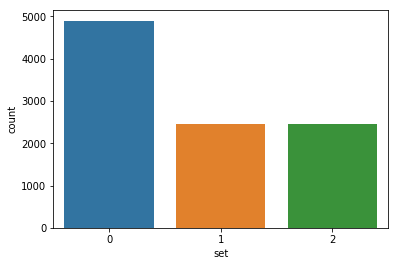

In [66]:
sns.countplot(ACCEDEsets_temp['set'],label="Count")
plt.show()

##### color score for the numeric value will tell us about the distribution of the features considered.

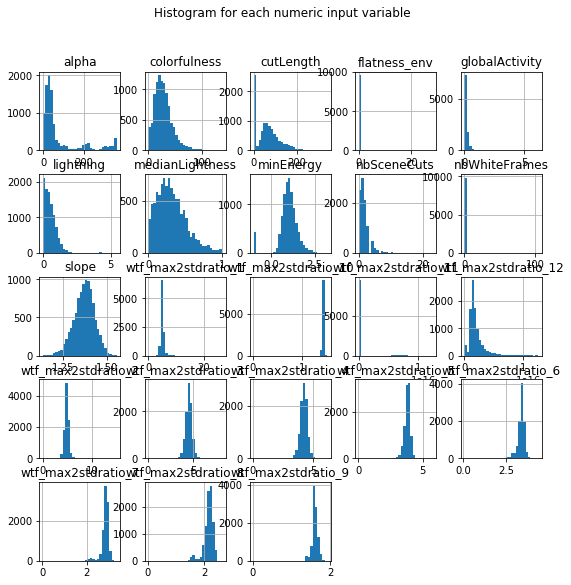

In [69]:
import pylab as pl
featuresArousal_TAC2015_temp.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('featuresArousal_TAC2015_hist')
plt.show()

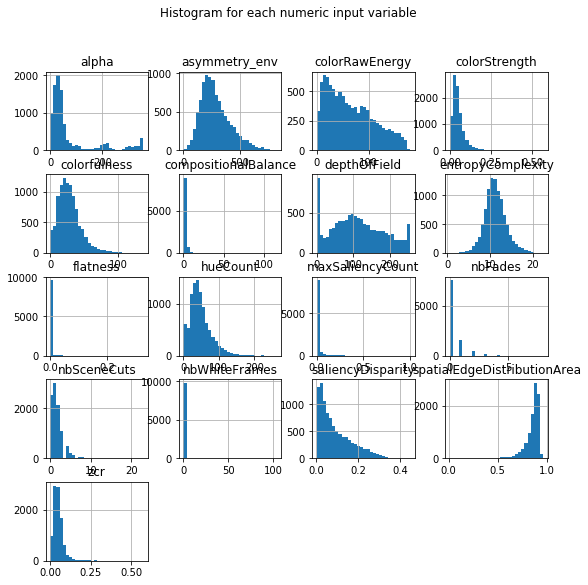

In [68]:
import pylab as pl
featuresValence_TAC2015_temp.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('featuresValence_TAC2015_hist')
plt.show()

##### Attributes are correlated or not?

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')


In [70]:
featuresArousal_TAC2015_temp.describe()

,colorfulness,minEnergy,alpha,lightning,globalActivity,nbWhiteFrames,nbSceneCuts,cutLength,flatness_env,wtf_max2stdratio_1,...,wtf_max2stdratio_5,wtf_max2stdratio_6,wtf_max2stdratio_7,wtf_max2stdratio_8,wtf_max2stdratio_9,wtf_max2stdratio_10,wtf_max2stdratio_11,wtf_max2stdratio_12,medianLightness,slope
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,...,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9.800000e+03,9.800000e+03,9800.000000,9800.000000
mean,28.626250,0.996509,77.008061,0.572924,0.175905,0.056327,1.709388,65.055315,0.120485,5.162495,...,3.815493,3.398420,2.832268,2.159206,1.609841,1.425356,2.739367e+14,2.083175e+15,0.315016,1.369836
std,17.483530,0.571553,97.347653,0.551031,0.244098,1.634437,1.964901,55.565316,1.009323,0.976941,...,0.250482,0.225513,0.199551,0.170219,0.081621,0.034748,1.352705e+15,1.530717e+15,0.197146,0.057949
min,0.000000,-1.000000,-1.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.071400,...,0.049300,0.041900,0.033000,0.026200,0.018400,0.013500,1.210000e-02,0.000000e+00,0.000000,1.136382
25%,16.502990,0.781883,19.000000,0.216309,0.055377,0.000000,0.000000,0.000000,0.000000,4.810000,...,3.690000,3.330000,2.790000,2.100000,1.570000,1.420000,1.410000e+00,1.290000e+15,0.168627,1.334016
50%,26.079168,1.018711,35.000000,0.469645,0.112316,0.000000,1.000000,60.000000,0.000000,5.060000,...,3.840000,3.440000,2.870000,2.190000,1.610000,1.430000,1.410000e+00,1.660000e+15,0.286275,1.373756
75%,36.911078,1.281504,75.000000,0.782071,0.210973,0.000000,2.000000,95.500000,0.000000,5.360000,...,3.970000,3.520000,2.940000,2.260000,1.650000,1.430000,1.410000e+00,2.340000e+15,0.427451,1.409151
max,137.014740,3.221411,359.000000,5.439072,6.161371,104.000000,23.000000,343.000000,28.169637,26.500000,...,5.770000,4.390000,3.350000,2.630000,1.930000,1.520000,1.250000e+16,1.260000e+16,1.000000,1.553887


In [72]:
featuresValence_TAC2015_temp.describe()

,colorfulness,alpha,hueCount,maxSaliencyCount,compositionalBalance,depthOfField,saliencyDisparity,spatialEdgeDistributionArea,entropyComplexity,nbWhiteFrames,nbFades,nbSceneCuts,asymmetry_env,flatness,zcr,colorStrength,colorRawEnergy
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,28.626250,77.008061,48.363673,0.019353,1.779211,111.607571,0.090304,0.854788,11.228598,0.056327,0.330102,1.709388,287.349524,0.001520,0.050264,0.052783,65.260263
std,17.483530,97.347653,30.484618,0.071859,3.535461,70.676694,0.077004,0.076405,2.477631,1.634437,0.715687,1.964901,134.132310,0.012706,0.034346,0.043244,44.764452
min,0.000000,-1.000000,1.000000,0.000017,0.000000,0.000000,0.001214,0.013367,0.616402,0.000000,0.000000,0.000000,1.363039,0.000000,0.000005,0.000000,0.000000
25%,16.502990,19.000000,28.000000,0.001541,0.449939,57.946923,0.027320,0.832339,9.652607,0.000000,0.000000,0.000000,191.048115,0.000000,0.029092,0.026676,26.667956
50%,26.079168,35.000000,43.000000,0.004041,0.985431,106.101902,0.066142,0.877340,11.054743,0.000000,0.000000,1.000000,261.717603,0.000000,0.044156,0.042940,57.099557
75%,36.911078,75.000000,63.000000,0.011062,1.908779,164.117710,0.136507,0.903355,12.661153,0.000000,0.000000,2.000000,362.604348,0.000000,0.062133,0.065363,97.198153
max,137.014740,359.000000,263.000000,1.000000,115.416573,255.000000,0.445358,0.965386,22.345915,104.000000,8.000000,23.000000,828.410179,0.329179,0.576643,0.567632,179.181373


##### Normalizing and Creating training and Test set 

##### separate labels
labels = temp['is_fraud']
temp = temp.drop(['is_fraud'], axis=1)

temp = pd.get_dummies(temp, dummy_na=True)
temp.head()

feature_names = temp.columns

labels = np.array(labels)
temp = np.array(temp)

len(feature_names)

In [101]:
#### create train test split
X_train, X_test, y_train, y_test 
= train_test_split(temp, labels, test_size=0.40, random_state=42)

In [59]:
labels = ACCEDEsets_temp['set']
labels = np.array(labels)
featuresArousal_TAC2015_temp = np.array(featuresArousal_TAC2015_temp)

In [73]:
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(featuresArousal_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fa = scaler.fit_transform(X_train_fa)
X_test_fa = scaler.transform(X_test_fa)

In [ ]:
print "Training Data"
print "Fraud: ", len([x for x in y_train if x == 1])
print "Non-Fraud: ", len([x for x in y_train if x == 0])
    
print "Test Data"
print "Fraud: ", len([x for x in y_test if x == 1])
print "Non-Fraud: ", len([x for x in y_test if x == 0])

In [74]:
X_train_fv, X_test_fv, y_train_fv, y_test_fv = train_test_split(featuresValence_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fv = scaler.fit_transform(X_train_fv)
X_test_fv = scaler.transform(X_test_fv)

In [ ]:
print "Training Data"
print "Fraud: ", len([x for x in y_train_fa if x == 1])
print "Non-Fraud: ", len([x for x in y_train_fa if x == 0])
print "Non-Fraud: ", len([x for x in y_train_fa if x == 2])
    
print "Test Data"
print "Fraud: ", len([x for x in y_test if x == 1])
print "Non-Fraud: ", len([x for x in y_test if x == 0])